# Assignment 2 - BLAST

In this assignment, you will implement a Heuristic Local Sequence Alignment Search algorithm, using filtration concepts as in BLAST.   
You will compare your local alignment algorithm from Assignment 1 to the one you’ll implement here. 
Please read the entire Assignment before starting your implementation.

## BLAST overview

From Wiki:

“In bioinformatics, BLAST for Basic Local Alignment Search Tool is an algorithm for comparing primary biological sequence information, such as the amino-acid sequences of different proteins or the nucleotides of DNA sequences. A BLAST search enables a researcher to compare a query sequence with a library or database of sequences, and identify library sequences that resemble the query sequence above a certain threshold.”

For this assignment, BLAST will be defined according to this variant:

The input is a **Database (DB)** sequence, and one or more **query** sequences.

1. **Database pre-process**:
  
  Mapping each $w$-mer (a substrings of length $w$) from the DB to its index in the DB string. Mapping can be done in various ways – you can implement it using a data structure of your choice. This is done once for the DB sequence, and used for multiple queries. 
        
2. **Query processing - Finding hits**:
  
  For each $w$-mer in the query ("sliding window"), make a list of neighbour words. 
  **Reminder**: A neighbour word $𝑠′$ of a $w$-mer $𝑠$ is a word of length $|s|=w$, with $score(s,s')\geq T$ (using a scoring matrix). $T$ is a chosen threshold. 
  
  For each neighbor, find the indexes of its appearances in the text (**hits**), using the data structures constructed in stage **1**. A **hit** is called an HSP (High-Scoring Segment Pair).

3. **Extension of HSPs**:
    
    Extend the hits found in stage **2** to obtain MSPs (Maximal Scoring Pairs). Extension stops when the extended HSP score drops X below the maximal score obtained so far.

4. **Reporting MSPs**:

    Report top scoring MSPs of the query, after removing duplicate MSPs.

## Part 1:

Implement BLAST as described above, for one query sequence and one database sequence. The scoring matrix is the same from Assignment 1.

**Bonus**: Implement an efficient way to avoid going over $23^w$[\*] possible neighbors of each $w$-mer. This was briefly discussed in the practical session.

[\*] Note that in the scoring matrix, there are 23 amino acids because of 3 additional letters: **X**, **B** and **Z**.     
   **X** - undetermined amino acid. **B** - the amino acid is either asparagine or aspartic acid; **Z** - either glutamic acid or glutamine



In [1]:
S = [
    [4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1,  1,  0, -3, -2,  0, -2, -1,  0, -4],
    [-1,  5,  0, -2, -3,  1,  0, -2,  0, -3, -2,  2, -1, -3, -2, -1, -1, -3, -2, -3, -1,  0, -1, -4],
    [-2,  0,  6,  1, -3,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3,  3,  0, -1, -4],
    [-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3,  4,  1, -1, -4],
    [0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1, -3, -3, -2, -4],
    [-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1, 0, -3, -1,  0, -1, -2, -1, -2,  0,  3, -1, -4],
    [-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2,  1,  4, -1, -4],
    [0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3, -1, -2, -1, -4],
    [-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3,  0,  0, -1, -4],
    [-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3, 1,  0, -3, -2, -1, -3, -1,  3, -3, -3, -1, -4],
    [-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2, 2,  0, -3, -2, -1, -2, -1,  1, -4, -3, -1, -4],
    [-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2,  0,  1, -1, -4],
    [-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1, 5,  0, -2, -1, -1, -1, -1,  1, -3, -1, -1, -4],
    [-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3, 0,  6, -4, -2, -2,  1,  3, -1, -3, -3, -1, -4],
    [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2, -2, -1, -2, -4],
    [1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2,  0,  0,  0, -4],
    [0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  1,  5, -2, -2,  0, -1, -1,  0, -4],
    [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3, -4, -3, -2, -4],
    [-2, -2, -2, -3, -2, -1, -2, -3,  2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1, -3, -2, -1, -4],
    [0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2, 1, -1, -2, -2,  0, -3, -1,  4, -3, -2, -1, -4],
    [-2, -1,  3,  4, -3,  0,  1, -1,  0, -3, -4,  0, -3, -3, -2,  0, -1, -4, -3, -3,  4,  1, -1, -4],
    [-1,  0,  0,  1, -3,  3,  4, -2,  0, -3, -3,  1, -1, -3, -1,  0, -1, -3, -2, -2,  1,  4, -1, -4],
    [0, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2,  0,  0, -2, -1, -1, -1, -1, -1, -4],
    [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4,  1]
]

AA = {
    'A': 0,
    'R': 1,
    'N': 2,
    'D': 3,
    'C': 4,
    'Q': 5,
    'E': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'L': 10,
    'K': 11,
    'M': 12,
    'F': 13,
    'P': 14,
    'S': 15,
    'T': 16,
    'W': 17,
    'Y': 18,
    'V': 19,
    'B': 20,
    'Z': 21,
    'X': 22,
}


In [2]:
# imports
from pprint import pprint
from typing import Dict, List, Iterator, Tuple
from collections import defaultdict
from functools import reduce, lru_cache
from itertools import product
from operator import add
from collections import Counter
from tqdm import tqdm_notebook, tqdm

def acid_gen() -> Iterator[str]:
    for k in AA.keys():
        yield k

SCORE_MATRIX_CALC = lambda c1, c2: S[AA[c1]][AA[c2]]
SCORE_MATRIX = {(a1, a2): SCORE_MATRIX_CALC(a1, a2) for a1, a2 in product(acid_gen(), repeat=2)}


In [3]:
# implement BLAST here
def sliding_window(string: str, w: int) -> Iterator[str]:
    for i in range(len(string) - w + 1):
        yield string[i:i+w], i

        
def sliding_window_file(file_path: str, w: int) -> Iterator[str]:
    with open(file_path) as f:
        f_str = ''.join(f.readlines()[1:]).replace('\n', '')
    return sliding_window(f_str, w)        


def get_wmer_map(db_file: str, w: int) -> Dict[str, List[str]]:
    wmer_dict = defaultdict(list)
    for wmer, index in sliding_window_file(db_file, w):
        wmer_dict[wmer].append(index)
    return wmer_dict


@lru_cache(maxsize=1000)
def align_score(w1: str, w2: str) -> int:
    acc = 0
    for t1, t2 in zip(w1, w2):
        acc += SCORE_MATRIX[t1, t2]
            
    return acc


def rec_iter_neighbours(cur_word: str, cur_negative: int, wmer: str, T: int) -> Iterator[str]:
    if len(cur_word) == len(wmer):
        if align_score(cur_word, wmer) >= T:
            yield cur_word
        return
    
    for c in acid_gen():
        cur_score = SCORE_MATRIX[wmer[len(cur_word)], c]
        
        if cur_score < 0 and cur_negative + cur_score < 0:
            continue
        elif cur_score < 0:
            yield from rec_iter_neighbours(cur_word + c, cur_negative + cur_score, wmer, T)
        else:
            yield from rec_iter_neighbours(cur_word + c, cur_negative, wmer, T)

            
def iter_neighbours(wmer: str, T: int) -> Iterator[str]:
    best_score = align_score(wmer, wmer)
    max_negative_allowed = best_score - T
    return rec_iter_neighbours('', max_negative_allowed, wmer, T)


def iter_hsps(wmer: str, T: int, db_map: Dict[str, List[int]]) -> Iterator[int]:
    for n in iter_neighbours(wmer, T):
        for indx in db_map[n]:
            yield indx


_MAX_SCORE = 0
_DB = _LEN_DB = None
_QUERY = _LEN_QUERY = None
def iter_msps(hsp_index: int, query_index: int, length: int, 
              X: int, db: str, query: str) -> Iterator[Tuple[Tuple[int, int], int]]:
    
    global _MAX_SCORE, _DB, _LEN_DB, _QUERY, _LEN_QUERY
    
    _MAX_SCORE = 0
    _DB, _LEN_DB = db, len(db)
    _QUERY, _LEN_QUERY = query, len(query)
    
    return iter_msps_(hsp_index, query_index, length, X)


def incorrect_request(hsp_index: int, query_index: int, length: int):
    return any([hsp_index < 0, 
            query_index < 0,
            hsp_index + length > _LEN_DB -1,
            query_index + length > _LEN_QUERY -1])


@lru_cache(maxsize=1000)
def iter_msps_(hsp_index: int, query_index: int, length: int, X: int) -> Iterator[Tuple[Tuple[int, int], int]]:
    
    global _MAX_SCORE    
    if incorrect_request(hsp_index, query_index, length):
        return
    
    cur_align_score = align_score(_DB[hsp_index: hsp_index+length], _QUERY[query_index: query_index+length])
    if cur_align_score < _MAX_SCORE - X:
        return
    
    _MAX_SCORE = cur_align_score if cur_align_score > _MAX_SCORE else _MAX_SCORE
    
    yield (hsp_index, length), _MAX_SCORE
    yield from iter_msps_(hsp_index, query_index, length+1, X)
    yield from iter_msps_(hsp_index-1, query_index-1, length+1, X)
    


In [4]:
from collections import namedtuple
from operator import attrgetter
MSP = namedtuple('MSP', ['db_index', 'len', 'score'])

def blast_it_to_orbit(
    db_file: str, query_file: str, w: int, T: int, X: int) -> Iterator[Tuple[Tuple[int, int], int]]:
    """

    :param db_file: path to db file
    :param query_file: path to query file
    :param w: the size of a wmer
    
    :param T: A neighbour word 𝑠′ of a 𝑤-mer 𝑠 is a word of length 
             |𝑠|=𝑤, with 𝑠𝑐𝑜𝑟𝑒(𝑠,𝑠′)≥𝑇 (using a scoring matrix). 𝑇 is a chosen threshold.
             
    :param X: Extend the hits found in stage 2 to obtain MSPs (Maximal Scoring Pairs). 
              Extension stops when the extended HSP score drops X below the maximal score obtained so far.  

    :return: iterator over not pruned msp's with their score
    """

    db = ''.join(open(db_file).readlines()[1:]).replace('\n', '')
    query = ''.join(open(query_file).readlines()[1:]).replace('\n', '')

    wmer_map = get_wmer_map(db_file, w)
    
    global _MAX_SCORE
    
    for window ,query_index in tqdm_notebook(sliding_window_file(query_file, w), desc='Window', total=len(query) - w):
        for hsp in iter_hsps(window, T, wmer_map):
            for msp, cur_max in iter_msps(hsp, query_index, w, X, db, query):
                cur_msp = MSP(*msp, cur_max)
                yield cur_msp

SORT_KEY = attrgetter("score", "len")
def k_best_msps(
    db_file: str, query_file: str, w: int, T: int, X: int, k: int) -> Tuple[Tuple[int, int], int]:
    
    msp_sorted =  sorted(blast_it_to_orbit(db_file, query_file, w, T, X), key=SORT_KEY)
    unique_msp_indeces = {msp.db_index for msp in msp_sorted}
    return  list(uniqify_indeces(msp_sorted, k))


UNIQ_DIST = 20
OVERLAP_TO_BE_SAME = 200
def _does_overlap(ref: MSP, tested: MSP):
    ref_start, ref_end = ref.db_index, ref.db_index + ref.len
    tested_start, tested_end = tested.db_index, tested.db_index + tested.len
    
    if ref_start < tested_start and ref_end - tested_start > OVERLAP_TO_BE_SAME:
        return True
    
    if tested_start < ref_start and tested_end - ref_start > OVERLAP_TO_BE_SAME:
        return True
    
    return False
          

def uniqify_indeces(msp_sorted, k):
    unique_indeces = {}
    
    for msp in reversed(msp_sorted):
        if len(unique_indeces) == k:
            return
        
        if msp.db_index in unique_indeces:
            continue
        
        # check start index radius
        if any([abs(msp.db_index - x) < UNIQ_DIST for x in unique_indeces]):
            continue
            
        # check overlap
        if any([_does_overlap(ref_msp, msp) for ref_msp in unique_indeces.values()]):
            continue
        
        unique_indeces[msp.db_index] = msp
        yield msp
    

In [5]:
import cProfile, pstats, io
import time

def profile_it(runnable):

    pr = cProfile.Profile()
    pr.enable()

    ret = runnable()
    
    pr.disable()
    sortby = 'tottime'
    s = io.StringIO()
    ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
    ps.print_stats()
    print(s.getvalue())
    
    return ret

def time_that(that):
    start_time = time.time()
    that()
    return time.time() - start_time

## Part 2
### Input files:
- query1.fasta
- db1.fasta

*query1.fasta* contains the query from Assignment 1, and *db1.fasta* contains the database from Assignment 1. In this part you will run your BLAST using the query in *query1.fasta* and the Database in *db1.fasta*.

1. For $w$=3 and different values of $T$, plot a graph of the avarge number of neighbors for each $w$-mer. 

2. Measure running time (in seconds) using different parameters of $w$, $T$ and $X$. Plot the results using a graph or several graphs.

3. Compare **3 top scoring** MSPs (without duplicate MSPs) to Local Alignemnt results from Assignment 1.  
The optimal local alignment of the query and DB is between *query[16:1382]* and *target[2999:4352]*.
    - Pick $w$, $T$ and $X$ that give you an MSP that is closest to the optimal alignment, while the running time is still fast.
    - The running time of the local alignment is 5 minutes. How much improvement in running time did you get?
    - Discuss the results. 
        - Is there an MSP which is identical to the optimal Local Alignment? 
        - If not, why do you think so?
        - Calculate MSP coverage (MSP length divided by query length*100) for each of the 3 top scoring MSPs.
        - How can BLAST be improved, in order to get more similar results to Local Alignment?

In [6]:
# 1. Avg number of neighbours per T:

db_file='db1.fasta'
query_file='query1.fasta'
w = 3

db = ''.join(open(db_file).readlines()[1:]).replace('\n', '')
query = ''.join(open(query_file).readlines()[1:]).replace('\n', '')

wmer_map = get_wmer_map(db_file, w)

def num_neighbours(wmer: str, T: int) -> int:
    l = 0
    for _ in iter_neighbours(wmer, T):
        l += 1
    return l


neighbouts_num = {}
for T in  tqdm_notebook([5, 9, 12, 15, 20], desc='T'):
    sum_neighbours = 0

    for wmer in tqdm_notebook(list(wmer_map), desc='wmer'):
        sum_neighbours += num_neighbours(wmer, T)
        align_score.cache_clear()
        
    neighbouts_num[T] = sum_neighbours / len(wmer_map)


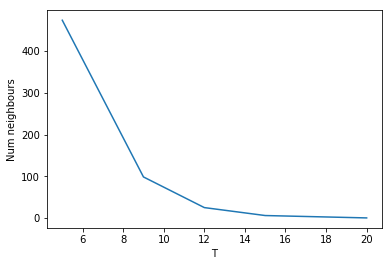

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.ylabel('Num neighbours')
plt.xlabel('T')

plt.plot(list(neighbouts_num.keys()), list(neighbouts_num.values()))

In [8]:
# Measure running time (in seconds) using different parameters of 𝑤, 𝑇 and 𝑋
param_sets = [
    [3, 15, 5],
    [3, 15, 10],
    [3, 15, 15],
    [4, 20, 5],
    [4, 20, 10],
    [4, 20, 15],
]

runtime = {}
for w, T, X in param_sets:
    align_score.cache_clear()
    iter_msps_.cache_clear()
    
    l = lambda: k_best_msps(
        db_file='db1.fasta',
        query_file='query1.fasta',
        w=w, T=T, X=X, k=3
    )

    runtime[w, T, X] = time_that(l)

runtime

{(3, 15, 5): 158.17098331451416,
 (3, 15, 10): 186.45456171035767,
 (3, 15, 15): 224.43919801712036,
 (4, 20, 5): 252.41543841362,
 (4, 20, 10): 261.6804301738739,
 (4, 20, 15): 267.2526841163635}

<BarContainer object of 6 artists>

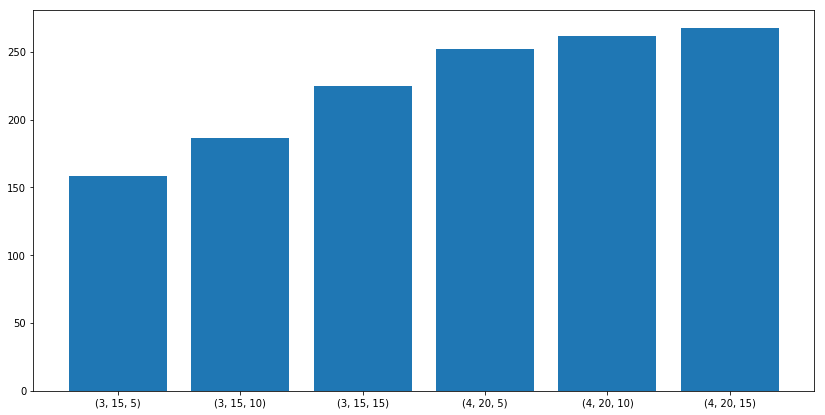

In [9]:
plt.figure(figsize=(14,7))
plt.bar(list(map(str, list(runtime.keys()))), list(runtime.values()))

In [10]:
l = lambda: k_best_msps(
    db_file='db1.fasta',
    query_file='query1.fasta',
    w=3, T=15, X=12, k=3
)

msps = l()
pprint(msps)

print('\n ########################################################## \n')

coverages = [(msp.len / len(query) * 100) for msp in msps]
pprint(coverages)


[MSP(db_index=2993, len=745, score=3841),
 MSP(db_index=3736, len=615, score=3084),
 MSP(db_index=4151, len=200, score=1056)]

 ########################################################## 

[53.90738060781476, 44.500723589001446, 14.47178002894356]


* First scoring MSP is almost adentical to the local alignment
* To come closer to local alignment we should increse X - but losing in runtime

## Part 3

### Input files:
- query2.fasta
- db2.fasta

*query2.fasta* contains a different query than the one in part 2 (alpha globin), and db2 is the database (DB), containing 3 homologs of the query.

1. Run local alignment algorithm using the query and the database. 
     - After running the algorithm, you will get **start** and **end** indices of the local alignment in the database. 
     - Remove the substring DB[start:end] from the DB string. Run local alignment again, using the new DB string. 
     - This will help you find locations of all 3 homologs of the query in the database.  

In this part you can use your code from Assignment 1, or use local alignment from [Biopython](http://biopython.org/DIST/docs/api/Bio.pairwise2-module.html) to perform a local alignment like this:

In [11]:
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist

db = 'EVLKKKKEVLAEVL' 
query = 'EVL'

matrix = matlist.blosum62
alignments = pairwise2.align.localds(db, query, matrix, -4, -4)

align1, align2, score, start, end = alignments[0]

pprint(alignments)

[('EVLKKKKEVLAEVL', '-----------EVL', 13.0, 11, 14),
 ('EVLKKKKEVLAEVL', '-------EVL----', 13.0, 7, 10),
 ('EVLKKKKEVLAEVL', 'EVL-----------', 13.0, 0, 3)]


In [12]:
db_file='db2.fasta'
query_file='query2.fasta'

db = ''.join(open(db_file).readlines()[1:]).replace('\n', '')
query = ''.join(open(query_file).readlines()[1:]).replace('\n', '')

alignments = []
for _ in range(3):
    alignments.append(pairwise2.align.localds(db, query, matrix, -4, -4)[0])
    _, _, _, start, end = alignments[-1]
    db = db[:start] + db[end:]


In [13]:
for align in alignments:
    print(f'score: {align[2]} start: {align[3]} end: {align[4]} len: {align[4] - align[3]}')

score: 540.0 start: 2395 end: 2537 len: 142
score: 213.0 start: 1348 end: 1495 len: 147
score: 204.0 start: 230 end: 379 len: 149


2. Run you BLAST using $w$, $T$ and $X$ parameters that gave you the best results in part 2. Report **5
top** scoring MSPs (without duplicates). 
    - Did you find all 3 homologs in the database? 
    - Measure Precision and Sensitivity.
    - Discuss how parameters $w$, $T$ and $X$ affect Precision and Sensitivity.

In [14]:
UNIQ_DIST = 50
OVERLAP_TO_BE_SAME = 20

l = lambda: k_best_msps(
    db_file='db2.fasta',
    query_file='query2.fasta',
    w=3, T=15, X=12, k=5
)

msps = l()
pprint(msps)


[MSP(db_index=2432, len=74, score=267),
 MSP(db_index=2492, len=44, score=178),
 MSP(db_index=1398, len=68, score=136),
 MSP(db_index=278, len=53, score=111),
 MSP(db_index=333, len=44, score=79)]


* We found all the MSPs but with a partial hit (len)
* precision & sensitivity are hard to calculate because we can say they are very high although our blast algorithm only had partial matches
* In order to raise precision we should raise T
* In order to raise sensitivity we can lower w and raise X